In [1]:
acc_list = []

In [90]:
import numpy as np
import pandas as pd
import sklearn.linear_model as sklearn_lm
import matplotlib.pyplot as mp_plt
import sklearn.discriminant_analysis as sklearn_lda
%matplotlib inline

In [86]:
# load data
data_names = ['x1','x2','y']
train_data = pd.read_csv('Normal_train_10D.txt', delimiter=',', names=data_names)
test_data = pd.read_csv('Normal_test_10D.txt', delimiter=',', names=data_names)
train_data = train_data.values
test_data = test_data.values

# preprocess data
X_train = train_data[:,:-1]
y_train = train_data[:,-1]
X_test = test_data[:,:-1]
y_test = test_data[:,-1]

# define constants
NUM_TRAIN = y_train.shape[0]
NUM_TEST = y_test.shape[0]
NUM_CLASSES = 2
NUM_SAMPLES = 5
NUM_ITER = 100

# training class labels
l1_idx = np.asarray([i for i in range(NUM_TRAIN) if y_train[i] == 1])
l2_idx = np.asarray([i for i in range(NUM_TRAIN) if y_train[i] == -1])
label_idx = [l1_idx, l2_idx]


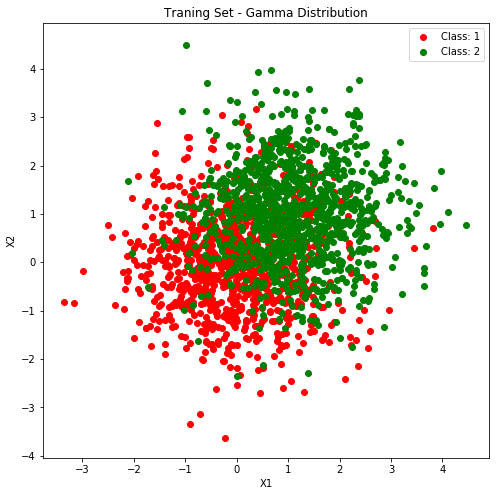

In [87]:
# plot data
data_color = ['red', 'green']
fig = mp_plt.figure(figsize=(8,8))
axes= fig.gca()
for i in range(NUM_CLASSES):
  axes.scatter(X_train[label_idx[i],0] , X_train[label_idx[i],1], c=data_color[i], label='Class: '+str(i+1))

axes.set_xlabel('X1')
axes.set_ylabel('X2')
axes.legend()
axes.set_title('Traning Set - Gamma Distribution')
mp_plt.savefig('figures/1.pdf')
  

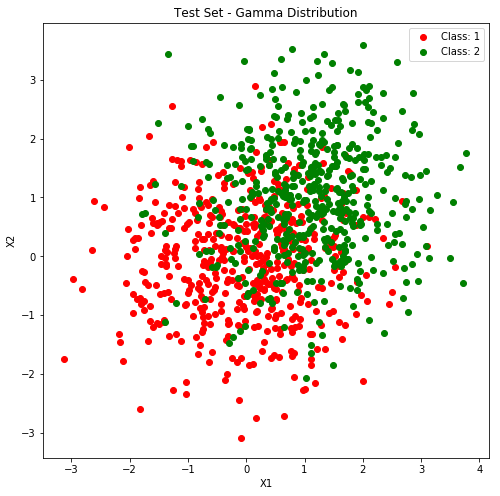

In [88]:
# class labels for testing
l1_test = np.asarray([i for i in range(NUM_TEST) if y_test[i] == 1])
l2_test = np.asarray([i for i in range(NUM_TEST) if y_test[i] == -1])
label_idx_test = [l1_test, l2_test]

# plot data
data_color = ['red', 'green']
fig = mp_plt.figure(figsize=(8,8))
axes= fig.gca()
for i in range(NUM_CLASSES):
  axes.scatter(X_test[label_idx_test[i],0] , X_test[label_idx_test[i],1], c=data_color[i], label='Class: '+str(i+1))
  
axes.set_xlabel('X1')
axes.set_ylabel('X2')
axes.legend()
axes.set_title('Test Set - Gamma Distribution')
mp_plt.savefig('figures/2.pdf')


In [94]:
def get_accuracy(y_test, y_pred):
  return np.float64(sum(y_test == y_pred)) / np.float64(y_test.size)

def linear_classifier(X_train, y_train, X_test, y_test, kwargs):
  if(len(kwargs) == 6):
    l1_idx, l2_idx = kwargs['l1_idx'], kwargs['l2_idx']
    normalise_data = kwargs['norm']
    NUM_SAMPLES = kwargs['num_samples']
    NUM_ITER = kwargs['num_iter']
    NUM_TRAIN = kwargs['num_train']
  else:
    raise RuntimeError('Error! kwargs accepts 5 should have parameters values.')
    
  if(normalise_data):
    X_mu = np.mean(X_train, axis=0)
    X_var = np.var(X_train, axis=0)
    X_train = (X_train - X_mu) / np.sqrt(X_var)
    X_test = (X_test - X_mu) / np.sqrt(X_var)
  
  # randomly sample data from both classes
  acc = np.empty((NUM_ITER, 1))
  for i in range(NUM_ITER):
    l1_samples = l1_idx[np.random.choice(NUM_TRAIN // 2, size=NUM_SAMPLES, replace=False)]
    l2_samples = l2_idx[np.random.choice(NUM_TRAIN // 2, size=NUM_SAMPLES, replace=False)]
    sample_idx = np.concatenate((l1_samples, l2_samples))

    X = X_train[sample_idx, :]
    y = y_train[sample_idx]

#     clf = sklearn_lm.SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty='none')
    clf = sklearn_lda.LinearDiscriminantAnalysis()
    clf.fit(X, y)

    y_pred = clf.predict(X_test)
    acc[i] = get_accuracy(y_test, y_pred)

  return acc, clf

kwargs = {'l1_idx':l1_idx, 'l2_idx':l2_idx, 'norm': False,
          'num_samples':5, 'num_iter': NUM_ITER, 
          'num_train': NUM_TRAIN}
acc, clf = linear_classifier(X_train, y_train, X_test, y_test, kwargs)
print(np.mean(acc), np.var(acc))


0.73614 0.0019030404000000003


In [28]:
acc_list.append(acc)

In [29]:
xmean = np.empty((10,1))
xvar = np.empty((10,1))
for i, acc in enumerate(acc_list):
  xmean[i] = np.mean(acc)
  xvar[i] = np.var(acc)
  
xmean = np.delete(xmean, 8)
xvar = np.delete(xvar, 8)

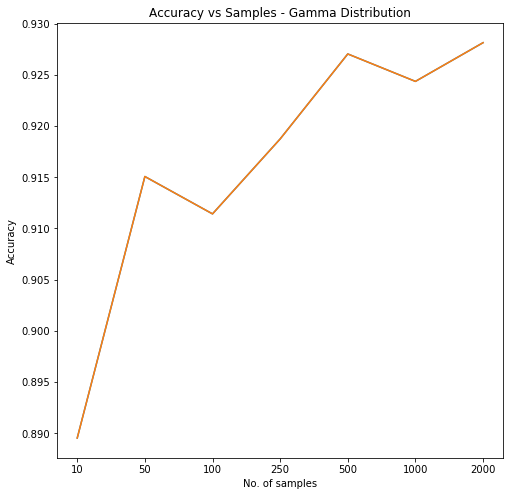

In [46]:
fig = mp_plt.figure(figsize=(8,8))
mp_plt.plot(np.arange(xmean.size), xmean)
mp_plt.xlabel('No. of samples')
mp_plt.xticks(np.arange(7), ['10','50','100','250','500','1000','2000'])
mp_plt.ylabel('Accuracy')
mp_plt.title('Accuracy vs Samples - Gamma Distribution')
# mp_plt.savefig('figures/4.pdf')

In [34]:
xvar = xvar[:-2]
xmean = xmean[:-2]


In [35]:
xmean

array([ 0.88953,  0.91507,  0.91142,  0.91874,  0.92704,  0.92436,  0.92814])

In [44]:
xvar

array([ 0.00311903,  0.00207869,  0.00389672,  0.00070063,  0.0007582 ,
        0.00128235,  0.00025506])

In [45]:
xhigh = xmean + xvar
xlow = xmean - xvar

In [76]:
print(clf.coef_, clf.intercept_)
w = clf.coef_
w0 = clf.intercept_
w = w / w0

[[ 1.00553309 -3.8858884 ]] [4.86330033]


In [77]:
w

array([[ 0.20675941, -0.79902291]])

In [70]:
x1 = np.linspace(-0.05,0.05,100)
x2 = np.linspace(-0.05,0.05,100)
x = np.stack((x1, x2), axis=-1)
print(x.shape, w.shape)

(100, 2) (1, 2)


In [71]:
y = np.dot(x, w.T) + 1

In [72]:
y.shape

(100, 1)

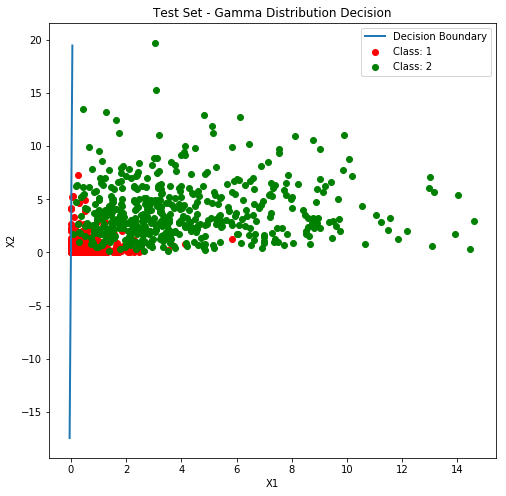

In [73]:
# class labels for testing
l1_test = np.asarray([i for i in range(NUM_TEST) if y_test[i] == 1])
l2_test = np.asarray([i for i in range(NUM_TEST) if y_test[i] == -1])
label_idx_test = [l1_test, l2_test]

# plot data
data_color = ['red', 'green']
fig = mp_plt.figure(figsize=(8,8))
axes= fig.gca()
for i in range(NUM_CLASSES):
  axes.scatter(X_test[label_idx_test[i],0] , X_test[label_idx_test[i],1], c=data_color[i], label='Class: '+str(i+1))
  
axes.set_xlabel('X1')
axes.set_ylabel('X2')
axes.set_title('Test Set - Gamma Distribution Decision')
axes.plot(x1, y, linewidth=2, label='Decision Boundary')
axes.legend()
mp_plt.savefig('figures/5.pdf')

In [118]:
w

array([[-10.37424855,  37.80896193]])